In [48]:
import pandas as pd
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [49]:
df=pd.read_csv(r"C:\Users\Microsoft\Desktop\Datasets\electricity_cost_dataset.csv")
df

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0
...,...,...,...,...,...,...,...,...,...
9995,708,Commercial,1365.0,76,77,22,23,0,885.0
9996,2960,Residential,3332.0,22,72,100,47,54,3081.0
9997,3942,Commercial,2427.0,61,43,48,49,0,3325.0
9998,3211,Commercial,4639.0,72,73,105,55,0,2892.0


In [50]:
df.head()  
df.info()  
df.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [51]:
df[df.duplicated(keep=False)]

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost


In [52]:
distinct_values = df['structure type'].unique()
print(distinct_values)  

['Mixed-use' 'Residential' 'Commercial' 'Industrial']


In [53]:
df['Category_encoded'] = df['structure type'].astype('category').cat.codes

In [54]:
df

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,Category_encoded
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0,2
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0,2
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0,2
3,966,Residential,1000.0,13,60,74,3,35,1575.0,3
4,4926,Residential,5990.0,23,65,32,57,185,4301.0,3
...,...,...,...,...,...,...,...,...,...,...
9995,708,Commercial,1365.0,76,77,22,23,0,885.0,0
9996,2960,Residential,3332.0,22,72,100,47,54,3081.0,3
9997,3942,Commercial,2427.0,61,43,48,49,0,3325.0,0
9998,3211,Commercial,4639.0,72,73,105,55,0,2892.0,0


In [55]:
corr_matrix = df[df.columns.difference(["structure type"])].corr()


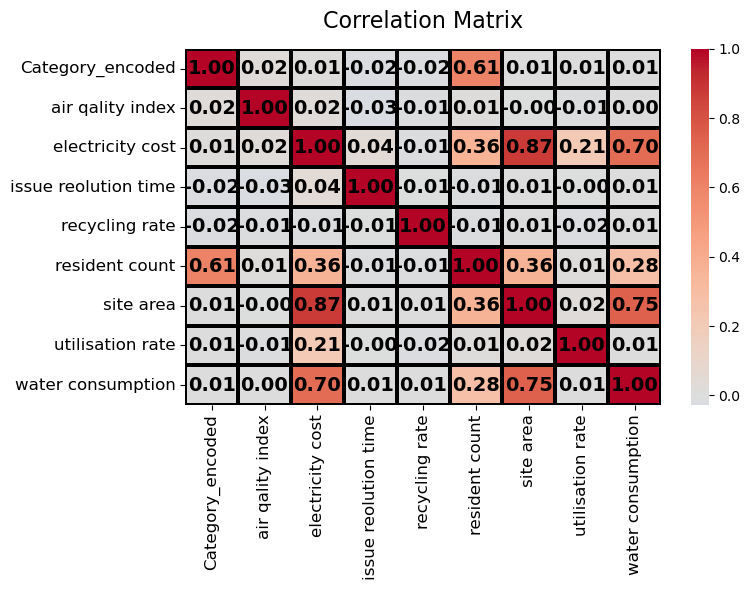

In [56]:
plt.figure(figsize=(8, 6))  # bigger figure
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",          # 2 decimal places
    cmap="coolwarm",
    center=0,
    linewidths=1.5,
    linecolor="black",
    annot_kws={"size": 14, "weight": "bold", "color": "black"}  # bigger, clearer numbers
)

plt.title("Correlation Matrix", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)  # keep labels horizontal
plt.tight_layout()
plt.show()

In [57]:
df.rename(columns={"site area": "Área do Local",
                   "structure type": "Tipo de Estrutura",
                   "water consumption": "Consumo de Água",
                   "recycling rate": "Tipo de Estrutura",
                   "utilisation rate": "Utilização de Energia",
                  "air qality index": "Índice de Qualidade do Ar",
                  "issue reolution time": "Tempo de Resolução de Problemas",
                   "resident count": "Contagem de Residentes",
                  "electricity cost": "Custo de Eletrecidade"}, inplace=True)

In [58]:
df

,Área do Local,Tipo de Estrutura,Consumo de Água,Tipo de Estrutura,Utilização de Energia,Índice de Qualidade do Ar,Tempo de Resolução de Problemas,Contagem de Residentes,Custo de Eletrecidade,Category_encoded
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0,2
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0,2
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0,2
3,966,Residential,1000.0,13,60,74,3,35,1575.0,3
4,4926,Residential,5990.0,23,65,32,57,185,4301.0,3
...,...,...,...,...,...,...,...,...,...,...
9995,708,Commercial,1365.0,76,77,22,23,0,885.0,0
9996,2960,Residential,3332.0,22,72,100,47,54,3081.0,3
9997,3942,Commercial,2427.0,61,43,48,49,0,3325.0,0
9998,3211,Commercial,4639.0,72,73,105,55,0,2892.0,0


In [59]:
df["Tipo de Estrutura"] = df["Tipo de Estrutura"].replace({
    "Mixed-use": "Misto",
    "Residential": "Residencial",
    "Commercial": "Comercial",
    "Industrial": "Industrial"
})

In [60]:
df

,Área do Local,Tipo de Estrutura,Consumo de Água,Tipo de Estrutura,Utilização de Energia,Índice de Qualidade do Ar,Tempo de Resolução de Problemas,Contagem de Residentes,Custo de Eletrecidade,Category_encoded
0,1360,Misto,2519.0,69,52,188,1,72,1420.0,2
1,4272,Misto,2324.0,50,76,165,65,261,3298.0,2
2,3592,Misto,2701.0,20,94,198,39,117,3115.0,2
3,966,Residencial,1000.0,13,60,74,3,35,1575.0,3
4,4926,Residencial,5990.0,23,65,32,57,185,4301.0,3
...,...,...,...,...,...,...,...,...,...,...
9995,708,Comercial,1365.0,76,77,22,23,0,885.0,0
9996,2960,Residencial,3332.0,22,72,100,47,54,3081.0,3
9997,3942,Comercial,2427.0,61,43,48,49,0,3325.0,0
9998,3211,Comercial,4639.0,72,73,105,55,0,2892.0,0


In [61]:
df = df.drop("Category_encoded", axis=1)
df

,Área do Local,Tipo de Estrutura,Consumo de Água,Tipo de Estrutura,Utilização de Energia,Índice de Qualidade do Ar,Tempo de Resolução de Problemas,Contagem de Residentes,Custo de Eletrecidade
0,1360,Misto,2519.0,69,52,188,1,72,1420.0
1,4272,Misto,2324.0,50,76,165,65,261,3298.0
2,3592,Misto,2701.0,20,94,198,39,117,3115.0
3,966,Residencial,1000.0,13,60,74,3,35,1575.0
4,4926,Residencial,5990.0,23,65,32,57,185,4301.0
...,...,...,...,...,...,...,...,...,...
9995,708,Comercial,1365.0,76,77,22,23,0,885.0
9996,2960,Residencial,3332.0,22,72,100,47,54,3081.0
9997,3942,Comercial,2427.0,61,43,48,49,0,3325.0
9998,3211,Comercial,4639.0,72,73,105,55,0,2892.0


In [62]:
df.to_csv("Custo de eletricidade.csv", index=False)